#TP ANAD_ ANOVA, 2019/20
#MAHLAL Mehenna 2CSSIQ1

In [30]:
# il existe quatre traitements (A, B, C et D), qui sont des groupes pour l'analyse ANOVA.
# Les traitements sont des variables indépendantes (facteurs)

In [31]:
import pandas as pd
d = pd.read_csv("anova_ds.csv", sep="\t")
d.head()

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


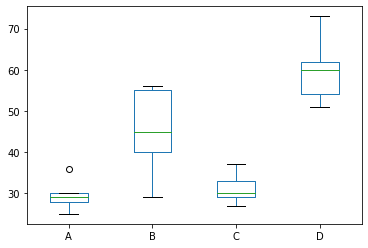

In [32]:
d.boxplot(column=['A', 'B', 'C', 'D'], grid=False)

In [33]:
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(d['A'], d['B'], d['C'], d['D'])
print(fvalue, pvalue)

17.492810457516338 2.639241146210922e-05


In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
d_melt = pd.melt(d.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
d_melt.columns = ['index', 'treatments', 'value']
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


In [35]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt['treatments'], alpha=0.03) #3%
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.03 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B     15.4 0.0251   0.4346 30.3654   True
     A      C      1.6    0.9 -13.3654 16.5654  False
     A      D     30.4  0.001  15.4346 45.3654   True
     B      C    -13.8 0.0482 -28.7654  1.1654  False
     B      D     15.0 0.0296   0.0346 29.9654   True
     C      D     28.8  0.001  13.8346 43.7654   True
-----------------------------------------------------
